In [23]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import h5py
import matplotlib.pyplot as plt
import rs_funcs as rs

def ls2sol(ls):
    N_s = 668.6
    ls_peri = 250.99
    t_peri = 485.35
    a = 1.52368
    e = 0.09340
    epsilon = 25.1919
    if (ls == 0).any():
        ls = .01
    nu = np.radians(ls) + 1.90258
    E = np.arctan((np.tan(nu/2))/(np.sqrt((1+e)/(1-e))))*2
    M = E - e*np.sin(E)
    Ds = (M/(2*np.pi))*N_s + t_peri
    if (Ds < 0).any():
        Ds = Ds + N_s
    if (Ds > N_s).any():
        Ds = Ds - N_s
    return(Ds)

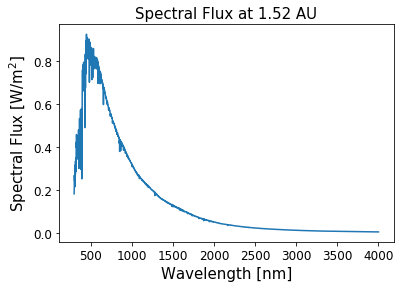

In [71]:
flux = rs.get_extraFlux()
wl = flux['lambda']
F152 = flux['F152']
plt.plot(wl,F152)
plt.xlabel('Wavelength [nm]',fontsize=15)
plt.ylabel(r'Spectral Flux [W/m$^{2}$]',fontsize=15)
plt.title('Spectral Flux at 1.52 AU',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Sanity1.png',dpi=300)

In [18]:
F = np.trapz(F152,x=wl)
print('TOA Solar Flux at 1.52 AU: ' + str(F))

TOA Solar Flux at 1.52 AU: 576.921223162338


/Users/aaronberliner/anaconda3/envs/rsenv/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/aaronberliner/anaconda3/envs/rsenv/lib/python3.8/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


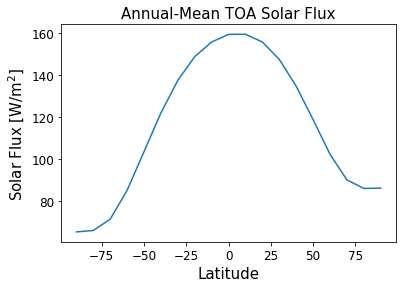

In [77]:
dsf = xr.open_dataset('StupidGridFull.nc', group='flux')
mu = dsf['irr_TOA_scaler']
ds = xr.open_dataset('StupidGridFull.nc')
lss = ds['ls']*15
sols = np.zeros(len(lss))
for i in range(0,len(lss)):
    sols[i] = ls2sol(lss[i])

mu = np.nan_to_num(mu,0.0)
temp1 = np.trapz(mu,x=sols,axis=1) * (1/688)
favg = np.mean(temp1,axis=1)
lats = np.arange(-90,91,10)
plt.plot(lats,favg*F)
plt.xlabel('Latitude',fontsize=15)
plt.ylabel(r'Solar Flux [W/m$^{2}$]',fontsize=15)
plt.title('Annual-Mean TOA Solar Flux',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Sanity2.png',dpi=300)

In [59]:
np.shape(lats)

(13,)

In [65]:
temp1[18,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
a = favg*F
a[10]

159.42807297239372

In [52]:
np.shape(mu)

(19, 25, 13)

In [53]:
la
np.shape(temp1)

(19, 13)

In [55]:

F

576.921223162338

In [80]:

(159.43 - 156)/156

0.021987179487179532